In [1]:
import warnings # Will be used to ignore the unnecessary warning so that the code look good esthetically
warnings.filterwarnings('ignore')

In [2]:
# import required libraries
from skimage.measure import label
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy as sp
from scipy import signal
import bruges
import seismic.additional_functions as seis # library created for the purpose of this lecture series, explore further if interested!

## Practical 1: Synthetic Seismic

In this exercise you will explore how geological features appear in seismic reflection data and how their appearance differs with density, P-wave velocity, wavelet phase and frequency. You will also investigate how seismic reflection images will degrade with depth. 

In this exercise you are simulating a "zero-offset" seismic experiment where sources and receivers are located at the same place just below the Earth's surface so you are only dealing with "normal-incidence" reflections. 

As you move through the exercise there will be questions to think about and discussion with your peers is encouraged. Ultimately, at the end of the exercise you will be asked to determine what type of source should be used in a geotechnical survey for wind-turbine pile installation. 

**If you have time see [Bonus](./Ex1_Bonus.ipynb) excercise.**

**Learning objectives**:
1) understand that seismic reflection profiles are produced by the convolution of wavelets reflected from different geological boundaries
2) Understand how reflection coefficients and velocity control the amplitude and depth of reflection in seismic profiles
3) Understand seismic vertical resolution and the limitations of the seismic reflection method

## 1.1 Reading a synthetic geological model 

In [3]:
# read in image to numpy array
img = seis.read_img('data/wedge.png', visualise = False) 
#print(type(img))
#print(img.shape)
#plt.imshow(img)
#We have 4 geological section, lets remove the boundary, assign a depth (e.g. 100) and rescale the axis.

# identify each geological section
model_bound = label(img)

# remove imaginary boundary separations seen in img
model = seis.remove_bounds(model_bound, visualise = False) 

# rescale axis to metres
depth = 100
model_scaled = sp.ndimage.zoom(model, 1/(np.shape(model)[0]/depth), order=0)

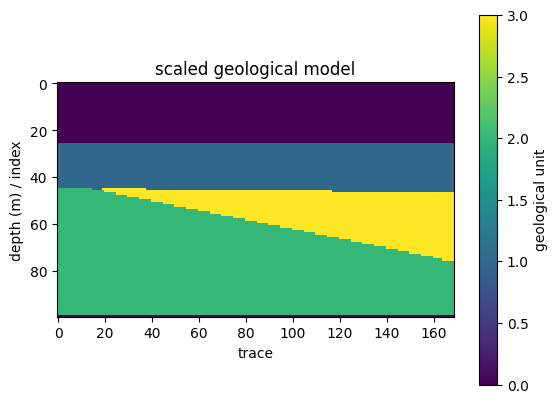

(100, 169)


In [4]:
plt.imshow(model_scaled, interpolation='nearest')
plt.title('scaled geological model')
plt.ylabel('depth (m) / index')
plt.xlabel('trace')
plt.colorbar(label='geological unit')
plt.show()
print(model_scaled.shape)

## 1.2 P-wave Velocity and Density


In [5]:
# define p-wave velocity and density of each section
properties_1 = np.array([[2700, 2750],  # [p-wave velocity, density] for layer 1 (index = 0)
                  [2400, 2450],
                  [2600, 2650], 
                  [3500, 2950]])

# bring properties into model
earth_1 = properties_1[model_scaled] # array shape = rows, cols, properties
print(earth_1.shape)

(100, 169, 2)


## 1.3. Acoustic impedance

In [18]:
impedances_1 = np.apply_along_axis(np.product, 2, earth_1) # Try and use efficient methods taught instead of for loops!

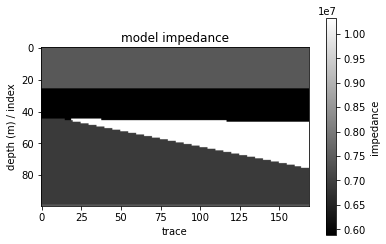

In [19]:
plt.imshow(impedances_1, cmap='gray', aspect=1)
plt.title('model impedance')
plt.ylabel('depth (m) / index')
plt.xlabel('trace')
plt.colorbar(label = 'impedance')
plt.show()